In [5]:
! pip install transformers -q

In [6]:
from transformers import pipeline


In [7]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [9]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [10]:
emotion_labels = emotion("I'm sorry that the order got delayed")


In [11]:
emotion_labels

[{'label': 'remorse', 'score': 0.7496781945228577}]

In [12]:
emotion_labels[0]['label']

'remorse'

In [42]:
import pandas as pd

In [43]:
large_text = pd.read_csv('data.csv')

In [44]:
large_text.shape

(638, 2)

In [45]:
large_text.head()

,timestamp,content
0,0:07,so it's been interesting look
1,0:09,I'm coming in and it looks like
2,0:11,into two major groups and the first
3,0:14,being this question of adaptation how do
4,0:17,we respond right here in New England to


In [46]:
large_text = large_text[:100]

In [47]:
large_text.shape

(100, 2)

In [48]:
large_text['content'][1:10].apply(emotion)

1    [{'label': 'neutral', 'score': 0.6820988059043...
2    [{'label': 'neutral', 'score': 0.9802261590957...
3    [{'label': 'neutral', 'score': 0.5045928955078...
4    [{'label': 'neutral', 'score': 0.9052352905273...
5    [{'label': 'neutral', 'score': 0.9972798824310...
6    [{'label': 'neutral', 'score': 0.9755212664604...
7    [{'label': 'approval', 'score': 0.645868003368...
8    [{'label': 'neutral', 'score': 0.9980964064598...
9    [{'label': 'neutral', 'score': 0.9976063966751...
Name: content, dtype: object

In [49]:
def get_emotion_label(text):
  return(emotion(text)[0]['label'])

In [50]:
get_emotion_label("India played very well and the fans were amused")

'amusement'

In [36]:
large_text['content'][1:10].apply(get_emotion_label)

1     neutral
2     neutral
3     neutral
4     neutral
5     neutral
6     neutral
7    approval
8     neutral
9     neutral
Name: content, dtype: object

In [37]:
large_text['emotion'] = large_text['content'].apply(get_emotion_label)

In [38]:
large_text

,timestamp,content,emotion
0,0:07,so it's been interesting look,excitement
1,0:09,I'm coming in and it looks like,neutral
2,0:11,into two major groups and the first,neutral
3,0:14,being this question of adaptation how do,neutral
4,0:17,we respond right here in New England to,neutral
...,...,...,...
95,4:01,towns on the shoreline aren't left with,neutral
96,4:04,any real incentive structure to do,neutral
97,4:06,restrictive zoning because that's where,neutral
98,4:08,their bread is is butter and their,neutral


In [39]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

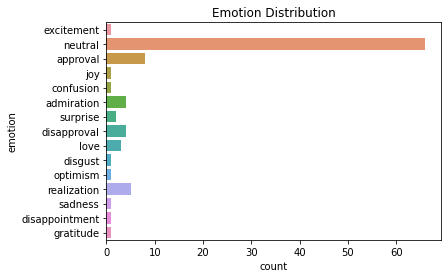

In [40]:
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")